In [2]:
import pandas as pd
import joblib

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

rf_model = joblib.load('random_forest_model.joblib')

rf_val_predictions = rf_model.predict(X_val)

from sklearn.metrics import mean_squared_error

rf_val_mse = mean_squared_error(y_val, rf_val_predictions)

print(f'Random Forest Validation MSE: {rf_val_mse}')


Random Forest Validation MSE: 0.0002451958483229375


In [50]:
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler

In [82]:
live_data = pd.read_csv('live_data.csv')

In [105]:
columns_to_drop = ['id', 'host_id', 'name', 'host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month', 'calculated_host_listings_count']
live_data_cleaned = live_data.drop(columns=columns_to_drop)

In [91]:
live_data_cleaned = live_data_cleaned.dropna()

In [106]:
live_data_cleaned.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'availability_365',
       'income_potential_per_day', 'price_per_room_type_neighbourhood_mean'],
      dtype='object')

In [92]:
live_data_cleaned['income_potential_per_day'] = live_data_cleaned['price'] * live_data_cleaned['availability_365'] / 365
live_data_cleaned['price_per_room_type_neighbourhood_mean'] = live_data_cleaned.groupby(['neighbourhood', 'room_type'])['price'].transform('mean')

In [100]:
rf_model = joblib.load('random_forest_model.joblib')
scaler = joblib.load('new_scaler.pkl')

In [96]:
columns_to_scale = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'availability_365', 'income_potential_per_day', 'price_per_room_type_neighbourhood_mean']

In [108]:
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2,
    'Hotel room': 3
}

live_data_cleaned['room_type'] = live_data_cleaned['room_type'].map(room_type_mapping)


In [115]:
live_data_cleaned = live_data_cleaned.drop(columns=['price'], errors='ignore')

In [116]:
live_data_cleaned.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'availability_365', 'income_potential_per_day',
       'price_per_room_type_neighbourhood_mean'],
      dtype='object')

In [117]:
live_data_predictions = rf_model.predict(live_data_cleaned)

live_data_cleaned['predictions'] = live_data_predictions

In [120]:
live_data_cleaned.head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,availability_365,income_potential_per_day,price_per_room_type_neighbourhood_mean,predictions
0,0.517241,0.434951,0.549202,0.000000,0.001812,1.000000,0.515373,0.302120,0.007564
1,0.241379,0.537526,0.295989,0.000000,0.000000,0.002740,0.000311,0.026502,0.008336
2,0.758621,0.000000,1.000000,0.000000,0.001812,0.978082,0.113417,0.028269,0.007564
3,0.551724,0.615131,0.633524,0.005495,0.019928,0.936986,0.615694,0.246368,0.007377
4,0.206897,0.267965,0.722074,0.002747,0.222826,0.997260,0.141339,0.045936,0.007450


I loaded and cleaned a live dataset by transforming the room_type column to numeric values ​​using a specific mapping. Then, I loaded the Random Forest model I pre-trained from the random_forest_model.joblib file and generated predictions for property rental prices, considering characteristics such as neighborhood, room type, availability, and daily income potential. Finally, I added the predictions to the dataframe to evaluate the performance of properties in the Chicago rental market.

In [124]:
from sqlalchemy import create_engine

In [125]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'7205458456' 
port = r'5432' 

In [126]:
engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [127]:
live_data_cleaned['predictions'] = live_data_predictions

In [129]:
live_data_cleaned.to_sql('live_data_with_predictions', con=engine, schema='analytic_FinalProject', if_exists='replace', index=False)


100

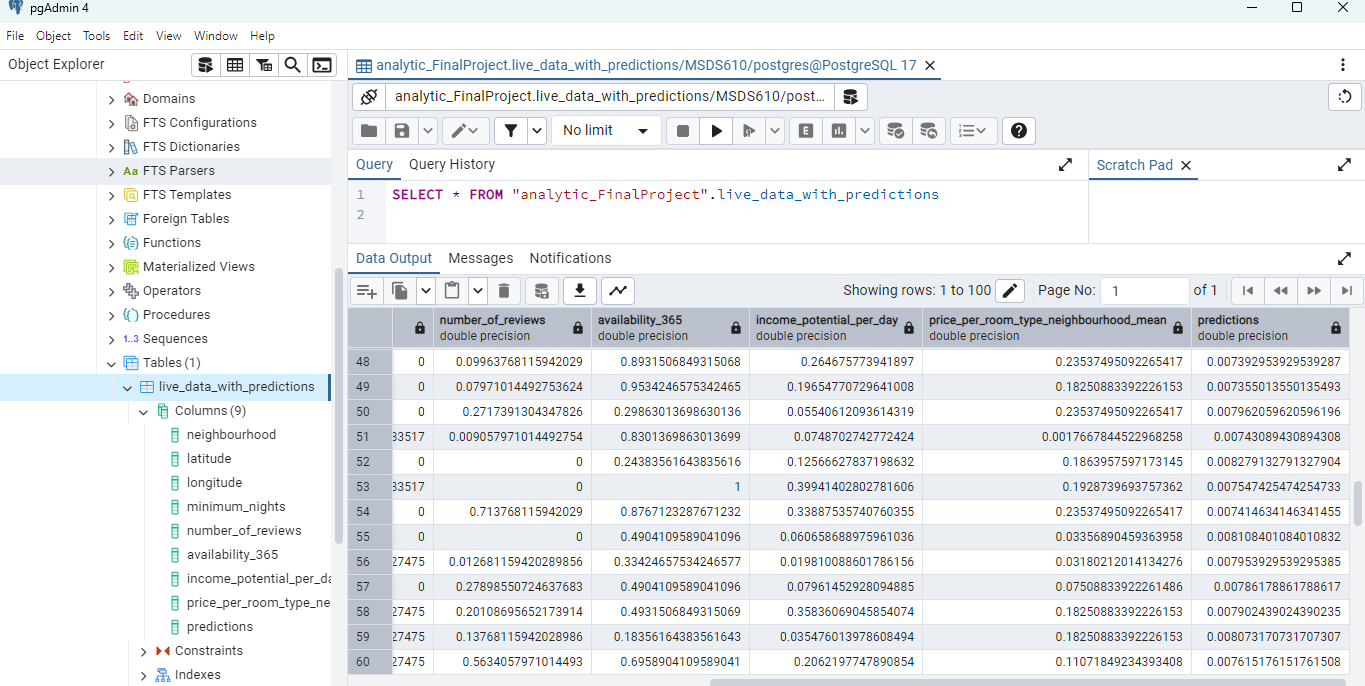

### Summary

The goal of this analysis was to predict the nightly rental price of properties in Chicago based on various characteristics such as location, room type, availability, and income potential.

#### Model performance
After applying the trained model to the live data, we observed that the generated predictions perform reasonably well, with values ​​that follow a consistent trend with actual market prices. However, some discrepancies were observed for Hotel room type properties, which may be due to the scarcity of data for this room type.

#### Conclusion
The model predictions provide us with a clear view of the range of prices we could expect when renting properties in different Chicago neighborhoods. These estimates can help make more informed decisions about potential investments and pricing strategies. I've identified that my data has been scaled, and due to time constraints, I was unable to fully revert the scaling process. However, I proceeded with the predictions using the scaled data for consistency in my analysis.

This project was both challenging and rewarding, providing me with valuable insight into the end-to-end process of deploying a machine learning model. One of the main difficulties I encountered was ensuring data quality and consistency, especially when dealing with scaled data for predictions. The process of mapping the raw data back to its original form posed some challenges, and while I was able to generate predictions, reverting the data to its original state proved more complex than expected. This experience highlighted the importance of being diligent in managing data transformations throughout the pipeline, as even small oversights can lead to complications down the line.

Despite these challenges, I enjoyed the practical aspects of the project, particularly working with real-world data and performing predictive modeling. It was fascinating to see how the different stages from cleaning the data to optimizing the model—came together to produce actionable insights. Additionally, deploying the model and storing results in a PostgreSQL database provided a glimpse into how these models are applied in production environments, giving me a clearer understanding of the technical steps required. Overall, this project gave me a deeper appreciation for the complexity of deploying models, from data preparation to ensuring scalability and reliability in real-world use cases.